# Task 4
# I201861 Shaheer Abdullah

In [91]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load Data and Preprocess Data

In [2]:
#Reading the csv file
df=pd.read_csv('hmnist_28_28_RGB.csv')

In [5]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [6]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [8]:
df.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [71]:
# Are there any missing values?
df.isna().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    0
pixel2349    0
pixel2350    0
pixel2351    0
label        0
Length: 2353, dtype: int64

In [17]:
print(f"Total No. of Samples: {len(df)}")

Total No. of Samples: 10015


In [9]:
df["label"].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [95]:
X = df.drop('label', axis=1)  # Features
Y= df['label'] 

In [115]:
desired_samples = 2* len(X)

# Applying SMOTE oversampling to generate the desired number of samples
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [116]:
#MinMax Scale
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled) 

#Standard Scale
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_resampled) 


In [117]:
preprocessed_data = pd.DataFrame(X_normalized, columns=X.columns)
preprocessed_data['label'] = y_resampled
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

In [118]:
df2=pd.read_csv('preprocessed_data.csv')

In [119]:
df2

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,0.245896,0.438351,1.029793,0.182664,0.375048,0.972182,0.109557,0.236015,0.766899,0.145745,...,-0.209689,-0.412066,-0.176737,0.149317,0.323040,0.603148,0.300173,0.573628,0.898666,2
1,-2.517682,-2.524894,-2.216737,-2.236911,-2.235979,-1.677365,-1.543380,-1.497840,-0.767571,-0.961059,...,-2.622236,-2.615718,-2.187468,-2.749839,-2.678495,-2.352001,-2.307303,-2.260847,-2.012119,2
2,0.245896,0.118576,0.233098,0.277923,0.131026,0.315456,0.198905,-0.105072,0.116700,0.246364,...,-0.337789,-0.282440,-0.055609,-0.291061,-0.196022,0.089209,-0.498367,-0.438685,-0.265648,2
3,-2.302554,-2.418302,-2.216737,-1.722513,-1.967556,-1.745302,-1.096640,-1.213602,-0.949627,-0.634049,...,-2.963836,-2.952747,-2.647756,-2.749839,-2.723631,-2.587556,-2.307303,-2.301339,-2.244982,2
4,-0.316749,-0.414381,-0.045745,0.163612,0.106624,0.564559,0.511623,0.463405,0.922947,0.724302,...,0.558910,0.676797,0.961870,-0.052523,0.052225,0.239108,-0.938378,-0.965087,-0.750779,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,-0.018878,0.310441,0.193264,-0.103112,0.253037,0.066354,-0.203161,0.179167,0.064684,-0.256729,...,0.067861,0.365693,0.404679,0.130967,0.345608,0.260522,0.234986,0.492643,0.394130,3
16601,-0.316749,-0.158562,-0.464009,-0.141216,0.106624,-0.295977,-0.158487,0.065472,-0.299428,-0.231574,...,-2.536836,-2.512016,-2.599305,-1.997526,-2.001457,-2.159274,-1.802105,-1.835675,-1.953903,3
16602,0.030767,0.587579,1.029793,-0.065009,0.545862,1.108056,-0.091476,0.662372,1.287059,-0.156110,...,0.217311,0.754572,1.373706,0.241062,0.684127,1.309815,0.300173,0.695105,1.228555,3
16603,-2.070876,-1.970618,-1.838307,-1.913031,-1.747937,-1.564137,-1.610391,-1.270449,-1.027651,-1.489307,...,-2.216587,-1.941660,-1.799858,-2.125970,-2.024025,-1.859476,-2.111743,-2.058384,-1.934498,3


# Spliting the Data into Training and Testing

In [121]:
# Split data into X and Y
X = df2.drop("label", axis=1)

Y = df2["label"]

In [122]:
len(X),len(Y)

(16605, 16605)

In [123]:
X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,0.245896,0.438351,1.029793,0.182664,0.375048,0.972182,0.109557,0.236015,0.766899,0.145745,...,-0.463186,-0.209689,-0.412066,-0.176737,0.149317,0.323040,0.603148,0.300173,0.573628,0.898666
1,-2.517682,-2.524894,-2.216737,-2.236911,-2.235979,-1.677365,-1.543380,-1.497840,-0.767571,-0.961059,...,-1.913390,-2.622236,-2.615718,-2.187468,-2.749839,-2.678495,-2.352001,-2.307303,-2.260847,-2.012119
2,0.245896,0.118576,0.233098,0.277923,0.131026,0.315456,0.198905,-0.105072,0.116700,0.246364,...,-0.044858,-0.337789,-0.282440,-0.055609,-0.291061,-0.196022,0.089209,-0.498367,-0.438685,-0.265648
3,-2.302554,-2.418302,-2.216737,-1.722513,-1.967556,-1.745302,-1.096640,-1.213602,-0.949627,-0.634049,...,-2.164387,-2.963836,-2.952747,-2.647756,-2.749839,-2.723631,-2.587556,-2.307303,-2.301339,-2.244982
4,-0.316749,-0.414381,-0.045745,0.163612,0.106624,0.564559,0.511623,0.463405,0.922947,0.724302,...,1.405345,0.558910,0.676797,0.961870,-0.052523,0.052225,0.239108,-0.938378,-0.965087,-0.750779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,-0.018878,0.310441,0.193264,-0.103112,0.253037,0.066354,-0.203161,0.179167,0.064684,-0.256729,...,0.373469,0.067861,0.365693,0.404679,0.130967,0.345608,0.260522,0.234986,0.492643,0.394130
16601,-0.316749,-0.158562,-0.464009,-0.141216,0.106624,-0.295977,-0.158487,0.065472,-0.299428,-0.231574,...,-2.415383,-2.536836,-2.512016,-2.599305,-1.997526,-2.001457,-2.159274,-1.802105,-1.835675,-1.953903
16602,0.030767,0.587579,1.029793,-0.065009,0.545862,1.108056,-0.091476,0.662372,1.287059,-0.156110,...,1.377456,0.217311,0.754572,1.373706,0.241062,0.684127,1.309815,0.300173,0.695105,1.228555
16603,-2.070876,-1.970618,-1.838307,-1.913031,-1.747937,-1.564137,-1.610391,-1.270449,-1.027651,-1.489307,...,-1.550839,-2.216587,-1.941660,-1.799858,-2.125970,-2.024025,-1.859476,-2.111743,-2.058384,-1.934498


In [124]:
Y

0        2
1        2
2        2
3        2
4        2
        ..
16600    3
16601    3
16602    3
16603    3
16604    3
Name: label, Length: 16605, dtype: int64

In [125]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2)
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [126]:
print(f"The training dataset: {len(X_train)},{len(Y_train)}")
print(f"The testing dataset: {len(X_test)},{len(Y_test)}")

The training dataset: 13284,13284
The testing dataset: 3321,3321


   # Applying Model

In [127]:
model= MLPClassifier(hidden_layer_sizes=(120,120), activation='relu', solver='adam', max_iter=1000)
# Create a function to fit and score models
# Set random seed
np.random.seed(42)
# Fit the model to the data
model.fit(X_train, Y_train)
# Evaluate the model and append its score to modeel_scores
model.score(X_test,Y_test)   

0.8301716350496838

In [128]:
# Test the model
X_test_Shape1 = np.array(X_test)
y_preds= model.predict(X_test_Shape1)
accuracy = accuracy_score(Y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print precision
precision = precision_score(Y_test, y_preds, average='macro')
print(f"Precision: {precision:.2f}")

# Calculate and print F1 score
f1 = f1_score(Y_test,y_preds, average='macro')
print(f"F1 Score: {f1:.2f}")

recall = recall_score(Y_test, y_preds, average='macro')
print(f"Recall: {recall:.2f}")

Accuracy: 0.83
Precision: 0.57
F1 Score: 0.53
Recall: 0.50


# Applying Grid Searach CV

In [132]:
# Standardize the feature data (important for ANNs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define an MLPClassifier with default parameters
mlp = MLPClassifier()

# Define a parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(130,130), (140,140)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500,1000], 
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fiting the training data
grid_search.fit(X_train, Y_train)

print("Best Parameters: ", grid_search.best_params_)
print("\nAccuracy: ", grid_search.score(X_test,Y_test))



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (140, 140), 'max_iter': 1000, 'solver': 'adam'}

Accuracy:  0.8358928033724782


# Accuracy Comparison

<Figure size 800x600 with 0 Axes>

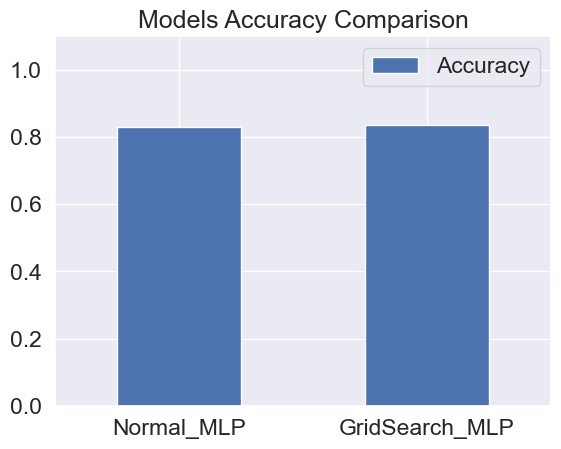

In [135]:
model_dict={
     "Normal_MLP":0.8301716350496838,
     "GridSearch_MLP": 0.8358928033724782
          }
model_compare = pd.DataFrame(model_dict, index=["Accuracy"])
# Create a bar plot
plt.figure(figsize=(8, 6))
ax = model_compare.T.plot.bar()
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Models Accuracy Comparison')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Evaluation on Different Metrices

In [157]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[  45    2    4    0   16    0    6]
 [   2   59    4    0   29    1    4]
 [   0    3  142    0   63    0   17]
 [  16   43  182  406  546    7  114]
 [   1    1    8    1 1331    2   16]
 [   0    0    0    0   17    9    1]
 [   1    0    8    0   54    0  160]]


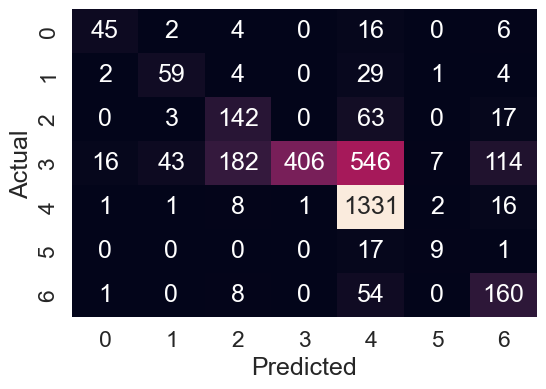

In [160]:
# Replace this with your confusion matrix
confusion_matrix = np.array(conf_matrix)

# Function to plot confusion matrix
def plot_conf_mat(conf_matrix):
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='d')
    # Add labels
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plot_conf_mat(confusion_matrix)

# Show the plot
plt.show()

In [167]:
#accuracy,precision,f1,recall
print(f"Precision with Best Model: {Accuracy:.2f}")
# Calculate and print precision
precision = precision_score(Y_test, y_pred, average='macro')
print(f"Precision with Best Model: {precision:.2f}")

# Calculate and print F1 score
f1 = f1_score(Y_test,y_pred, average='macro')
print(f"F1 Score with Best Model: {f1:.2f}")

recall = recall_score(Y_test, y_pred, average='macro')
print(f"Recall with Best Model: {recall:.2f}")

Precision with Best Model: 0.84
Precision with Best Model: 0.61
F1 Score with Best Model: 0.56
Recall with Best Model: 0.60


<Figure size 400x300 with 0 Axes>

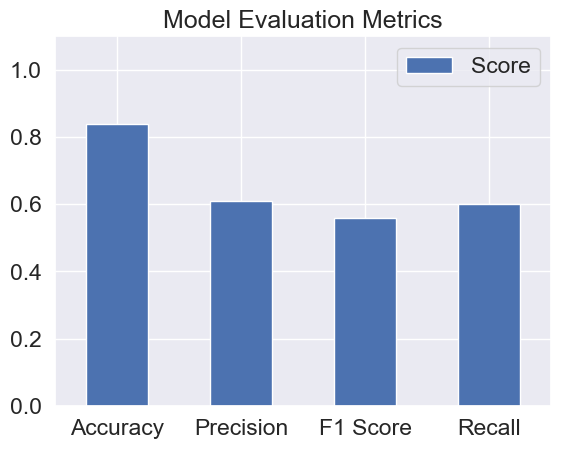

In [168]:
Metrics_dict={
              "Accuracy": 0.84,
              "Precision": 0.61,
              "F1 Score": 0.56,
              "Recall": 0.60    
}
model_compare = pd.DataFrame(Metrics_dict, index=["Score"])
# Create a bar plot
plt.figure(figsize=(4, 3));
ax = model_compare.T.plot.bar();
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show();